In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable

# Gradient descent

First, lets import linear algebra methods

In [3]:
def vector_sum(vectors):
    num_elements = len(vectors[0])
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

Create derivative functions

In [4]:
def derivative(f: Callable, x, h):
    return (f(x+h)-f(x))/h

In [5]:
# Here we go for each component in the multivariable function
def partial_derivative(f: Callable, v, i, h):
    m = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(m) - f(v))/h

In [21]:
def estimate_gradient(f: Callable, v, h = 0.0001):
    return [partial_derivative(f, v, i, h) for i in range(len(v))]

In [7]:
# Subtract the slope with the gradient
def gradient(v, gradient, a):
    step = np.dot(a, gradient)
    return np.add(v, step)

In [8]:
def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

## Test

In [9]:
v = [np.random.uniform(-100, 100) for i in range(3)]
v

[89.8532077186226, 64.67817898348122, 92.70630332627908]

In [10]:
for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient(v, grad, -0.01)
print(epoch, v)

999 [1.51220016e-07 1.08851264e-07 1.56021682e-07]


## Working

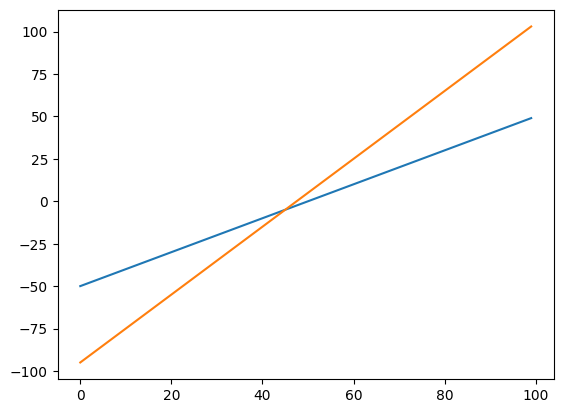

In [11]:
inputs = [(x, 2 * x+ 5) for x in range(-50, 50)]
plt.plot(inputs);

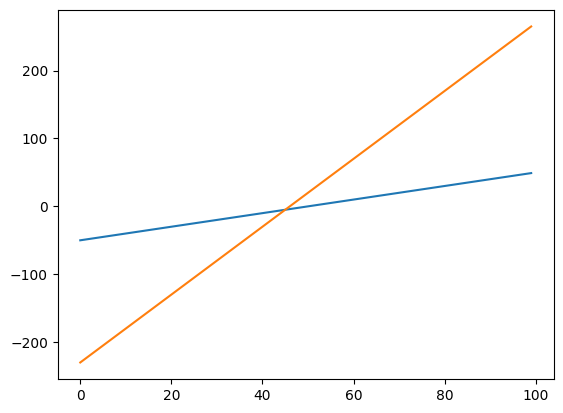

In [12]:
inputs2 = [(x, 5 * x+ 20) for x in range(-50, 50)]
plt.plot(inputs2);

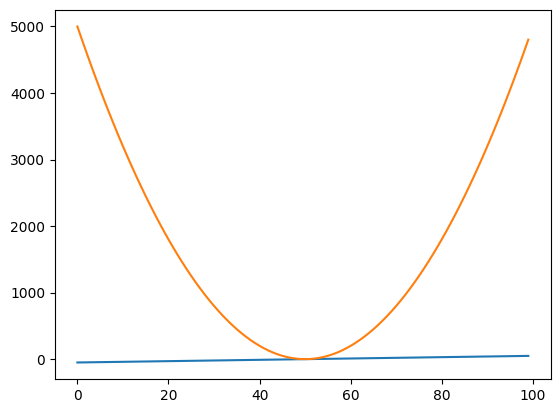

In [13]:
inputs3 = [(x, 2 * x ** 2 + 0) for x in range(-50, 50)]
plt.plot(inputs3)

$$y = 2x^2$$
$$\sqrt{y} = x\sqrt{2}$$
$$ y_1 = mx$$ where m is $\sqrt{2}$

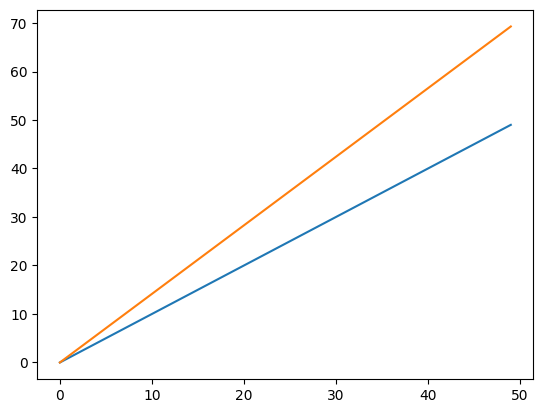

In [14]:
inputs3f = [(x, x * 1.414 + 0) for x in range(0, 50)]
plt.plot(inputs3f);

In [15]:
def linear_gradient(x, y, theta):
    m, b = theta
    predicted = m * x + b
    error = (predicted - y)
    MSE = error**2
    grad = [2 * error * x, 2 * error]
    return grad

In [16]:
def gradientDescent(df, theta, alpha, epochs):
    for epoch in range(epochs):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in df])
        theta = gradient(theta, grad, -alpha)
        if epoch % 100 == 0:
            print(epoch, theta)
    slope, intercept = theta

In [17]:
gradientDescent(inputs, [np.random.uniform(-1, 1), np.random.uniform(-1, 1)], 0.001, 2000)

0 [3.60550911 0.93292521]
100 [1.99800085 1.6714178 ]
200 [1.99836347 2.27516913]
300 [1.99866031 2.76940966]
400 [1.99890331 3.17400291]
500 [1.99910223 3.50520944]
600 [1.99926507 3.77634043]
700 [1.99939837 3.99829262]
800 [1.9995075  4.17998624]
900 [1.99959683 4.32872356]
1000 [1.99966996 4.45048232]
1100 [1.99972982 4.550156  ]
1200 [1.99977883 4.63175047]
1300 [1.99981895 4.69854502]
1400 [1.99985179 4.75322411]
1500 [1.99987867 4.79798529]
1600 [1.99990068 4.83462751]
1700 [1.99991869 4.86462342]
1800 [1.99993344 4.88917856]
1900 [1.99994551 4.90927979]


In [18]:
gradientDescent(inputs2, [np.random.uniform(-1, 1), np.random.uniform(-1, 1)], 0.001, 2000)

0 [ 7.72696121 -0.69932542]
100 [4.98982376 3.05654647]
200 [4.99166956 6.1298167 ]
300 [4.99318057 8.64564508]
400 [ 4.99441751 10.70514263]
500 [ 4.99543008 12.39108041]
600 [ 4.99625899 13.77121616]
700 [ 4.99693755 14.90101747]
800 [ 4.99749303 15.82589097]
900 [ 4.99794775 16.58300728]
1000 [ 4.99832    17.20279485]
1100 [ 4.99862472 17.71016292]
1200 [ 4.99887418 18.12550258]
1300 [ 4.99907838 18.46550629]
1400 [ 4.99924555 18.74383879]
1500 [ 4.99938239 18.97168625]
1600 [ 4.99949442 19.15820584]
1700 [ 4.99958612 19.31089378]
1800 [ 4.99966119 19.43588657]
1900 [ 4.99972265 19.53820769]


In [19]:
gradientDescent(inputs3f, [np.random.uniform(-1, 1), np.random.uniform(-1, 1)], 0.001, 3000)

0 [1.83611438 0.33599222]
100 [1.40470318 0.30669749]
200 [1.40516968 0.29130789]
300 [1.40561277 0.27669052]
400 [1.40603363 0.26280663]
500 [1.40643337 0.24961941]
600 [1.40681305 0.2370939 ]
700 [1.40717368 0.2251969 ]
800 [1.40751621 0.21389688]
900 [1.40784156 0.20316387]
1000 [1.40815058 0.19296943]
1100 [1.40844409 0.18328653]
1200 [1.40872288 0.1740895 ]
1300 [1.40898768 0.16535396]
1400 [1.40923919 0.15705676]
1500 [1.40947808 0.1491759 ]
1600 [1.40970498 0.14169049]
1700 [1.4099205  0.13458068]
1800 [1.4101252  0.12782764]
1900 [1.41031963 0.12141345]
2000 [1.41050431 0.11532111]
2100 [1.41067972 0.10953448]
2200 [1.41084632 0.10403821]
2300 [1.41100457 0.09881774]
2400 [1.41115488 0.09385922]
2500 [1.41129764 0.08914952]
2600 [1.41143324 0.08467613]
2700 [1.41156204 0.08042722]
2800 [1.41168437 0.07639151]
2900 [1.41180056 0.0725583 ]


since $ \sqrt{y} = mx$\
where m is $\sqrt{2}$\
then $y = m^2 x^2$ and $y = 2 x^2$

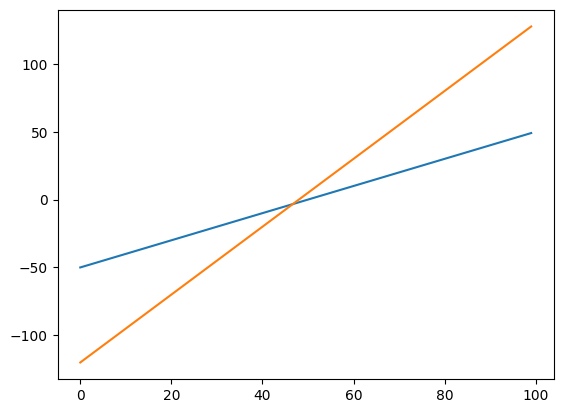

In [20]:
inputs4 = [(x, 2 * x+ 0.5 * x + 5) for x in range(-50, 50)]
plt.plot(inputs4);